In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import joblib
import cv2

### Importing the dataset

In [2]:
#read train and test files
train_file = pd.read_csv('emnist-letters-train.csv')
test_file = pd.read_csv('emnist-letters-test.csv')

### Data Checking

In [3]:
#view first 5 records of train_file
train_file.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_file.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

In [5]:
#rename first column as label for both test and train set
train_file.rename(columns={'23':'label'}, inplace=True)
test_file.rename(columns={'1':'label'}, inplace=True)

#check train data
train_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#check train data
test_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#list of all digits that are going to be predicted
np.sort(train_file.label.unique())
train_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the training dataset into training and validation sets 

In [8]:
#define the number of samples for training set and for validation set
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)
num_train,num_validation

(71039, 17759)

In [9]:
#generate training data from train_file
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [10]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(71039, 784)
(71039,)
(17760, 784)
(17760,)


In [12]:
y_train[70]

1

Label: 1 as a


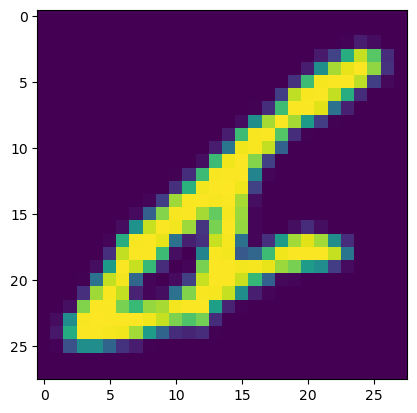

In [13]:
#28 ,28 stands for height and width
index=70
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
          'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

print("Label: " + str(y_train[index]) + ' as ' + alphabet[(y_train[index])-1])

#image fixing
image= x_train[index]
image = image.reshape([28, 28])
plt.imshow(image)

Label: 1 as a


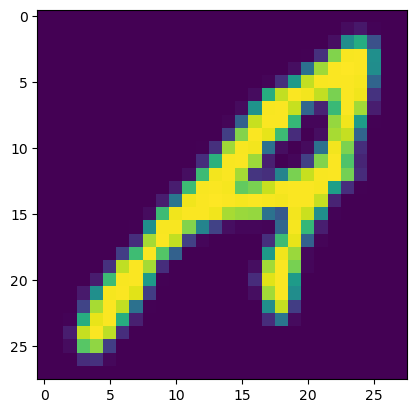

In [14]:
#28 ,28 stands for height and width
index=70
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
          'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

print("Label: " + str(y_train[index]) + ' as ' + alphabet[(y_train[index])-1])

#image fixing
image= x_train[index]
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)

## Training the Random Forest model on the Training set

In [15]:
#fit a Random Forest classifier
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Predicting the Validation set results


In [16]:
#predict value of label using classifier
prediction_validation = clf.predict(x_validation)

In [17]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.6938626126126126


In [18]:
(y_validation[y_validation==prediction_validation][75])

15

Predicted 15 as o


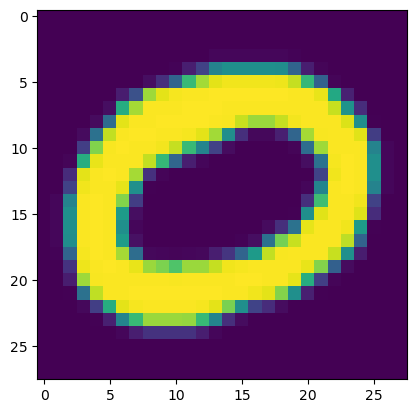

In [19]:
index=75
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
          'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
print("Predicted " + str(y_validation[y_validation==prediction_validation][index]) + " as " + 
    alphabet[(y_validation[y_validation==prediction_validation][index])-1])

#image fixing
image= x_validation[y_validation==prediction_validation][index]
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)

## Making The Confusion Matrix For Validation set

In [20]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

Validation Confusion Matrix: 
[[400  16   5  17  10   7  26  31   1   2   8   1  10  32  17   5  35  15
    6   6  21   1  10   5   4   9]
 [  9 441   6  28   8   2  33  22   7   5   4   6   2   4  13   5   7  12
   15   6   4   3   3   3   7  11]
 [  8   1 589   2  39   3  12   0   2   0   5  10   0   0   8   3   2   6
    2   5   3   1   1   1   0   9]
 [ 11  24   5 417   3  10   9  12   8  32   7   7   3   7  30   6   4   7
    4   6   6   7   3   6   4   5]
 [ 13  11  29   2 514   8  11   0   4   3  12   3   1   2   3   5  15  25
    4   8   2   3   4   1   0  12]
 [  8   2   5   1   6 441  11   9   7   4  10   7   5   4   0  54  18  12
    5  49   0   4   4   7   5   2]
 [ 27  33  13  10  12  14 332  10   5  12   5   4   4   1   4  11  99   7
   25   8   7   1   4   4  18   7]
 [ 25  18   1  11   2   2   1 457   1   1  21  13  20  26   1   1   8   5
    2   6  10   6  18   6   5   5]
 [  0   1   2   5   1  12   4   5 395  31   3 198   0   0   0   4   6   2
    7   8   1   0   0   

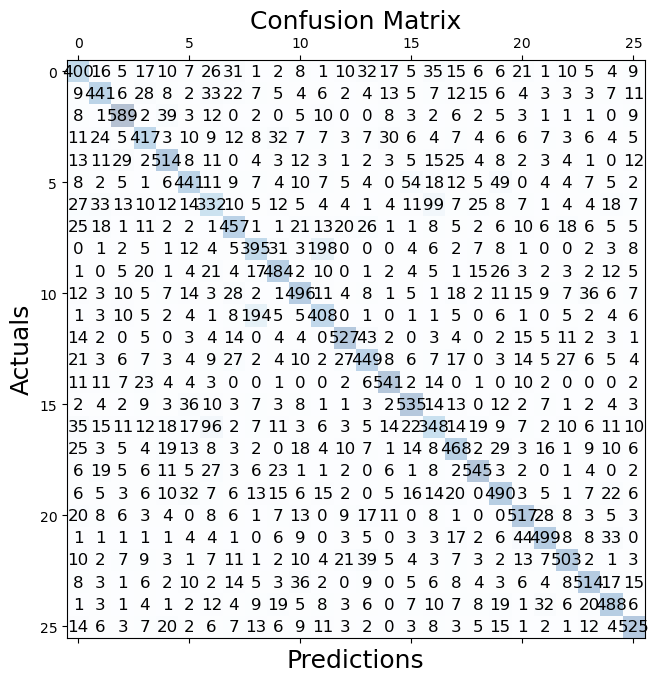

In [21]:
matrix = confusion_matrix(y_validation,prediction_validation)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Splitting The Test Dataset

In [22]:
y_test = test_file['label']
test_file=test_file.drop("label", axis=1)
x_test = test_file
x_test.shape , y_test.shape

((14799, 784), (14799,))

## Predicting the Test set results

In [23]:
#predict test data
prediction_test = clf.predict(x_test)
prediction_test.shape

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


(14799,)

In [24]:
print("Validation Accuracy: " + str(accuracy_score(y_test,prediction_test)))

Validation Accuracy: 0.6781539293195487


In [25]:
prediction_test[10000]

13

Predicted m


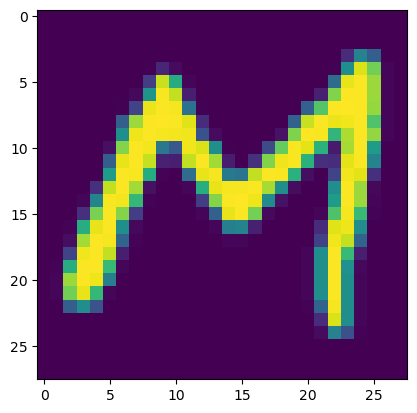

In [26]:
index=10000
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
          'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
print("Predicted " + alphabet[(prediction_test[index])-1])

#image fixing
image= x_test.iloc[index].values
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)

## Making The Confusion Matrix For Test set

In [27]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_test,prediction_test)))

Validation Confusion Matrix: 
[[464  11  16  16  14   8  29  22   1   3  12   1  17  22  18  11  48  26
    6   8  13   1   8  11   2  11]
 [ 15 539  10  31  10   7  25  31   3   8   8  12   4   7  13   3  14   9
   17  10   1   4   2   4   4   9]
 [ 14   3 632   5  57  10   4   2   2   1   5  11   1   3  11   4   2   5
    5   9   6   0   1   1   0   6]
 [ 13  40   2 525   1   3   9  17   3  20  10   6   3  14  56   6  11   3
    4   6  11   5  11   8   3  10]
 [ 18  10  33   2 609   8   5   2   5   0  11   3   3   5   6   6   8  16
   10  13   3   4   1   1   1  17]
 [  9   4   2   4  17 536  15   9   9   7   8  15   1   2   4  45  17  10
    7  45   4   4   1   8   8   9]
 [ 27  25  15   7  19  18 369   8   4  23   7   7   6   7   8  10 153   7
   28  13   8   3   2   5  13   8]
 [ 24  19   0  11   7   3  13 540   3   2  25  22  14  42   1   3   4   6
    1   7  16   2  14  16   2   3]
 [  4   3   2   6   2   9   3   3 476  20   2 204   0   0   0   3   4   3
    5  12   3   2   1   

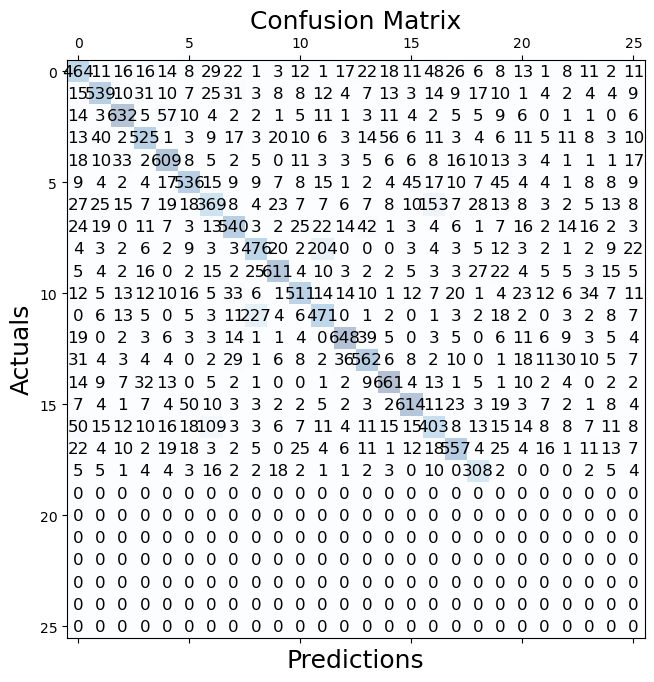

In [28]:
matrix = confusion_matrix(y_test,prediction_test)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()